<a href="https://colab.research.google.com/github/yakubszatkowski/100_days_python/blob/master/push/Seaborn_and_Linear_Regression_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

In [476]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Statements

In [477]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [478]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [479]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Day 77 - Linear regression and Data Visualisation with Seaborn/cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [480]:
# 1. Rows and columns
df.shape

(5391, 6)

In [481]:
# 2. Are there any NaN values present?
df.isna().values.any()

False

In [482]:
# 3. Are there any duplicate rows?
df.duplicated().any()

False

In [483]:
# 4. What are the data types of the columns?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [484]:
df.sample()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
4393,339,5/24/2013,Epic,"$100,000,000","$262,794,441","$107,518,682"


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [485]:
df['USD_Production_Budget'].str.replace(r'[$,]','', regex=True)  # this is a test cell

0          110000
1          385907
2          200000
3          100000
4          245000
          ...    
5386     15000000
5387    160000000
5388    175000000
5389     50000000
5390     20000000
Name: USD_Production_Budget, Length: 5391, dtype: object

In [486]:
# my take
df[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']] = df[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']].replace([',', '[$,]'], '', regex=True).astype(int)  # --> [$,] <-- this was hard
df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


In [487]:
# different take
characters_to_replace = [',', '[$,]']
columns_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']
for column in columns_to_clean:
  df[column] = df[column].replace(characters_to_replace, '', regex=True)
  df[column] = df[column].astype(int)
df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


In [488]:
# Angela's take:
characters_to_replace = [',', '$']
columns_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']
for column in columns_to_clean:
  for character in characters_to_replace:
    df[column]=df[column].astype(str).str.replace(character, '', regex=True)  # .astype(str).str fixes the issue with replacing $
  df[column] = pd.to_numeric(df[column])

df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [489]:
df.Release_Date = pd.to_datetime(df.Release_Date)
df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [490]:
# most of the questions can be answered with .describe()
df.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [491]:
# 1. average budget
df.USD_Production_Budget.mean().astype(int)
# or
df.describe().loc['mean'].USD_Production_Budget.astype(int)

31113737

In [492]:
# 2. average gross revenue
df.USD_Worldwide_Gross.mean().astype(int)
# or
df.describe().loc['mean'].USD_Worldwide_Gross.astype(int)

88855421

In [493]:
# 3. minimum wordwide gross and domestic gross revenue made
df[['USD_Worldwide_Gross', 'USD_Domestic_Gross']].min()
# or
df.describe().loc['min'].loc[['USD_Worldwide_Gross', 'USD_Domestic_Gross']]

USD_Worldwide_Gross   0.00
USD_Domestic_Gross    0.00
Name: min, dtype: float64

In [494]:
# 4. are bottom 1/4 movies making money
# selecting bottom 1/4 of the movies by rank
bottom_25_percent_movies = df.sort_values('Rank', ascending=False).head(int(len(df)/4))


In [495]:
# on average they are losing money
int((bottom_25_percent_movies.USD_Production_Budget - bottom_25_percent_movies.USD_Worldwide_Gross).mean())

-7432282

In [496]:
# different solution by Angela however it uses 25% from .describe() which works differently - it didn't calculate mean of the bottom 25% which can be proven by using those commands:
# bottom_25_percent_movies.USD_Production_Budget.mean()
# and
# df.describe().loc['25%'].USD_Worldwide_Gross
df.describe().loc['25%'].USD_Worldwide_Gross - df.describe().loc['25%'].USD_Production_Budget

-1134794.0

In [497]:
# 5. highest production budget and world wide gross - both are the same movie
df.loc[df.USD_Worldwide_Gross.idxmax()]
df.loc[df.USD_Production_Budget.idxmax()]

Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
Name: 3529, dtype: object

In [498]:
# 6. Revenue of the lowest budget film
df[df.USD_Production_Budget == df.USD_Production_Budget.min()]  # .USD_Worldwide_Gross

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [499]:
# and highest budget film
df[df.USD_Production_Budget == df.USD_Production_Budget.max()]  # .USD_Worldwide_Gross

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [500]:
len(df[df.USD_Domestic_Gross == 0])  # or .count()

512

In [501]:
df[df.USD_Domestic_Gross == 0].sort_values(by='USD_Production_Budget', ascending=False)  # highest budget movies release dates are after the date on which this dataset was compiled

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [502]:
len(df[df.USD_Worldwide_Gross == 0])  # or .count()

357

In [503]:
df[df.USD_Worldwide_Gross == 0].sort_values(by='USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [504]:
international_releases = df.loc[(df.USD_Domestic_Gross == 0) & (df.USD_Worldwide_Gross != 0)]  # it has to be &, and and , doesnt work
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [505]:
international_releases = df.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


# EASY EXAMPLE OF USING .querry()

In [506]:
df2 = pd.DataFrame({'A': range(1, 6),
                   'B': range(10, 0, -2),
                   'C': range(10, 5, -1)})
df2

,A,B,C
0,1,10,10
1,2,8,9
2,3,6,8
3,4,4,7
4,5,2,6


In [507]:
df2[df2.A > df2.B]

,A,B,C
4,5,2,6


In [508]:
df2.query('A > B')

,A,B,C
4,5,2,6


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [509]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [510]:
not_released = df[df.Release_Date > scrape_date]
not_released

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [511]:
len(not_released)

7

In [512]:
clean_df = df.drop(not_released.index)
clean_df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


In [513]:
print(f'Cleaned df length: {len(clean_df)}')
print(f'Old df length: {len(df)}')

Cleaned df length: 5384
Old df length: 5391


### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [514]:
movies_that_lost_money = clean_df.query('USD_Production_Budget > USD_Worldwide_Gross')
movies_that_lost_money

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,1000000,130874,130874
5373,2161,2017-08-25,Tulip Fever,25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


In [515]:
round((len(movies_that_lost_money) / len(clean_df) * 100), 2)

37.28

# Seaborn for Data Viz: Bubble Charts

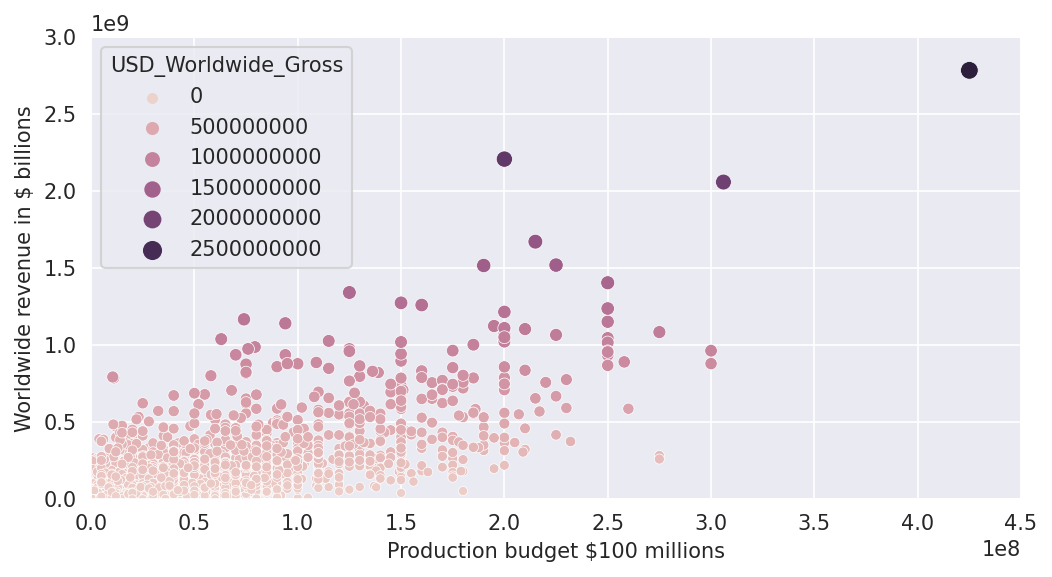

In [516]:
plt.figure(figsize=(8,4), dpi=150)

with sns.axes_style('darkgrid'):  # 'whitegrid', 'dark',  or 'ticks'
  ax = sns.scatterplot(
                  clean_df,
                  x='USD_Production_Budget',
                  y='USD_Worldwide_Gross',
                  hue='USD_Worldwide_Gross',  # color
                  size='USD_Worldwide_Gross'
  )

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Worldwide revenue in $ billions',
       xlabel='Production budget $100 millions')

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



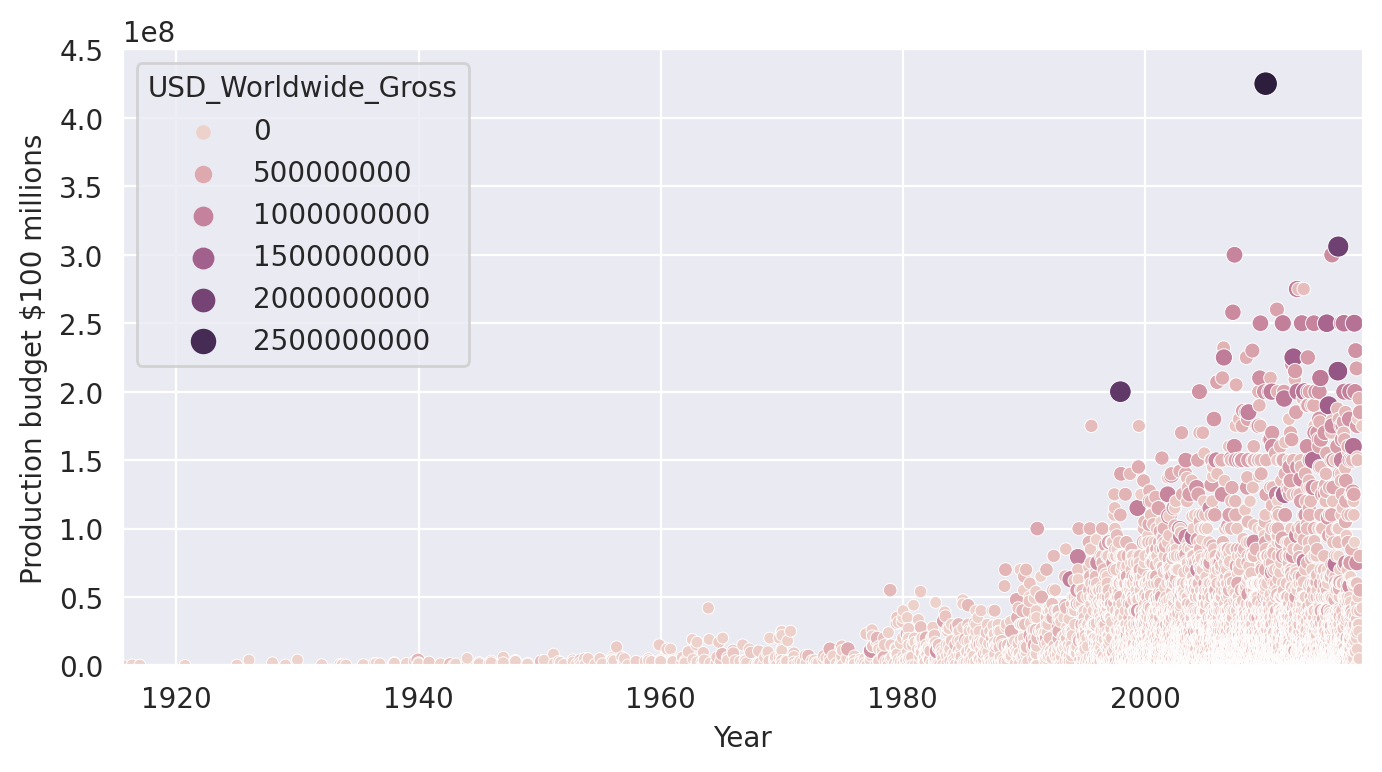

In [517]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):  # 'whitegrid', 'dark',  or 'ticks'
  ax = sns.scatterplot(
                  clean_df,
                  x='Release_Date',
                  y='USD_Production_Budget',
                  hue='USD_Worldwide_Gross',  # color
                  size='USD_Worldwide_Gross'
  )

ax.set(
    xlim=(clean_df.Release_Date.min(), clean_df.Release_Date.max()),
    ylim=(0, 450000000),
    xlabel='Year',
    ylabel='Production budget $100 millions'
)

plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [518]:
years = pd.DatetimeIndex(clean_df.Release_Date).year
decades = (np.floor(years/10)*10).astype(int)  # or years//10*10
clean_df['Decade'] = decades
clean_df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


In [519]:
decades2 = years//10*10
decades2

Int64Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
            ...
            2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', name='Release_Date', length=5384)

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [520]:
# up to and including 1969 1970
old_films = clean_df[clean_df.Release_Date < '1971-01-01']
new_films = clean_df.drop(old_films.index)
old_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


In [521]:
# different take up to and including 1969
old_films = clean_df[clean_df.Decade <= 1960]
new_films = clean_df[clean_df.Decade > 1960]

In [522]:
print(f'Amount of old movies: {len(old_films)}\nAmount of new movies: {len(new_films)}')

Amount of old movies: 153
Amount of new movies: 5231


In [523]:
print('The most expensive movie prior to 1970 is:')
old_films[old_films.USD_Production_Budget == old_films.USD_Production_Budget.max()]

The most expensive movie prior to 1970 is:


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960


In [524]:
old_films[old_films.USD_Worldwide_Gross == old_films.USD_Worldwide_Gross.max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
23,4248,1939-12-15,Gone with the Wind,3900000,390525192,198680470,1930


# Seaborn Regression Plots

[(0.0, 45000000.0), (0.0, 400000000.0)]

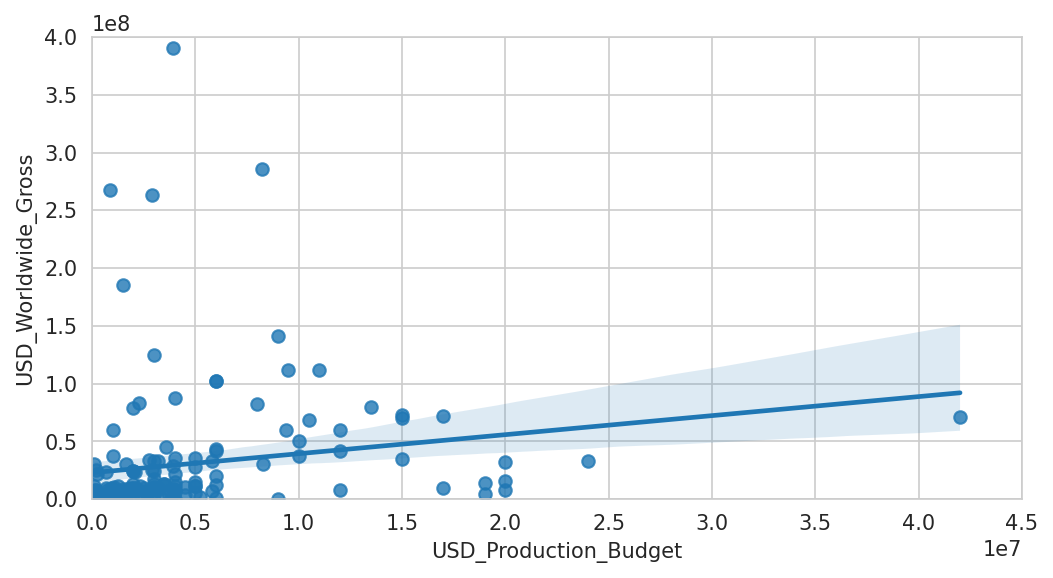

In [525]:
plt.figure(figsize=(8,4), dpi=150)
with sns.axes_style('whitegrid'):
  ax = sns.regplot(old_films,
              x='USD_Production_Budget',
              y='USD_Worldwide_Gross',)

ax.set(
    xlim=(0, 45000000),
    ylim=(0, 400000000),
)

In [526]:
old_films.USD_Worldwide_Gross.max()

390525192

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

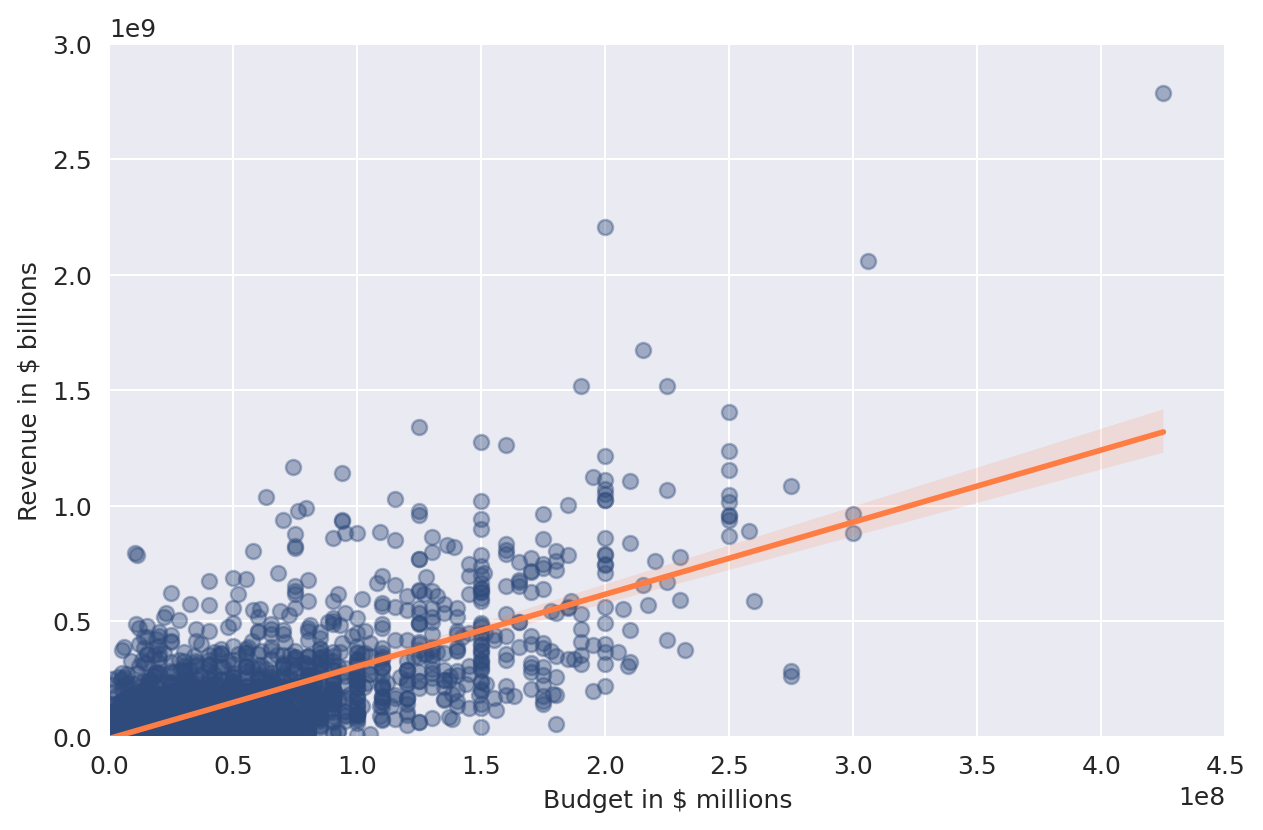

In [527]:
plt.figure(figsize=(8,5), dpi=180)

with sns.axes_style('darkgrid'):
  ax = sns.regplot(
      new_films,
      x='USD_Production_Budget',
      y='USD_Worldwide_Gross',
      scatter_kws={"color": "#2f4b7c", 'alpha': 0.4}, line_kws={"color": "#ff7c43"}  # alpha dillutes color
  )

ax.set(
    xlim=(0, 450000000),
    ylim=(0, 3000000000),
    xlabel='Budget in $ millions',
    ylabel='Revenue in $ billions'
)

plt.show()

* Do our data points for the new films align better or worse with the linear regression than for our older films? - Better
* Roughly how much would a film with a budget of $150 million make according to the regression line? 450-500 millions

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [528]:
regression = LinearRegression()

In [529]:
# Linear regression should be pandas datafram not series

# Explanatory Variale or Feature:
X = new_films.USD_Production_Budget.to_frame()  # or X = new_films[['USD_Production_Budget']]
# It also possible to add more columns if more Explanatory Variables are there

# Response Variable or Target:
y = new_films.USD_Worldwide_Gross.to_frame()  # or y = new_films[['USD_Worldwide_Gross']]

In [530]:
regression.fit(X, y)

LinearRegression()

In [531]:
# theta zero - intercept
regression.intercept_
# it says that if the movie is $0 then estimated movie revenue is -$8.65 milion

array([-8650768.01])

In [532]:
# thera one - slope
regression.coef_
# it says that every $1 our budget increases, the movie revenue increases by 3.1

array([[3.12]])

In [533]:
# R-squared
regression.score(X, y) * 100
# means that this model explains 56% of the variance in movie revenue

55.77032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [534]:
C = old_films.USD_Production_Budget.to_frame()
u = old_films.USD_Worldwide_Gross.to_frame()

In [535]:
regression.fit(C, u)

LinearRegression()

In [536]:
regression.intercept_

array([22821538.64])

In [537]:
regression.coef_

array([[1.65]])

In [538]:
regression.score(C, u)*100

2.937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [539]:
budget = 350000000
revenue = regression.intercept_ + regression.coef_ * budget
revenue

array([[599521139.04]])

# Summary

* Use nested loops to remove unwanted characters from multiple columns

* Filter Pandas DataFrames based on multiple conditions using both .`loc[]` and `.query()`

* Create bubble charts using the Seaborn Library

* Style Seaborn charts using the pre-built styles and by modifying Matplotlib parameters

* Use floor division (i.e., integer division) to convert years to decades

* Use Seaborn to superimpose a linear regressions over our data

* Make a judgement if our regression is good or bad based on how well the model fits our data and the r-squared metric

* Run regressions with scikit-learn and calculate the coefficients.